**сеть Хопфилда: задача комивояжера**

Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

---

In [2]:
n = 15 # количество точек
X = np.random.rand(n,2)*1000.0 # точки

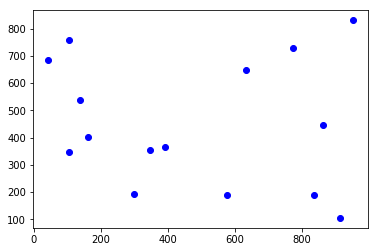

In [3]:
plt.scatter(x=X[:,0],y=X[:,1],c='b')

In [4]:
L = pairwise_distances(X,metric='euclidean') # матрица расстояний

In [5]:
# сеть Хопфилда состоит из nxn нейронов 

# состояние сети удобно рассматривать как матрицу nxn нейронов 
# т.е. матрицу [город,позиция]

# состояние должно содержать в каждой строке и столбце 
#   ровно один активый элемент (единицу)

In [6]:
# оценка емкости сети N/(2*log2(N)), N - количество нейронов

In [7]:
A = B = 500.0
C = 500.0
D = 200.0
u = 0.02

In [8]:
# матрица весов соответственно имеет размер (nxn)x(nxn)
#
# 𝑊 𝑥𝑖,𝑦𝑗 = 
#     −𝐴 𝛿𝑥𝑦 (1 − 𝛿𝑖𝑗 )
#     −𝐵 𝛿𝑖𝑗 (1 − 𝛿𝑥𝑦 )
#     −С d(x,y) (𝛿 𝑗,𝑖+1 + 𝛿 𝑗,𝑖−1 )
#     +D

# где δij = 1, если i=j, иначе δij = 0. 
# xy - индексы городов
# ij - индексы позиций

# первый член равен -A для всех связей в той же строке (x=y), 
# кроме связи нейрона с самим собой (при i=j). 

# второй член равен -B для всех связей в том же столбце (i=j),
# кроме связи с самим собой (x=y). 

# третий член пропорционален расстоянию между городами x и y, 
# если эти города соседние в маршруте ( i=j-1 или i=j+1 ).

In [39]:
# W = X.dot(X.T)

In [40]:
# W = np.zeros([n*n,n*n])

# for x in range(n):
#     for y in range(n):
#         for i in range(n):
#             for j in range(n):
#                 W[ x+(n*y), i+(n*j) ] = (
#                     -A*(x==y)*(1-(i==j)) 
#                     -B*(i==j)*(1-(x==y))
#                     -C*((i==(j-1))+(i==(j+1)))*L[x,y]
#                     +D
#                 )

In [41]:
# W

In [30]:
# np.eye(n)

In [31]:
# сеть стартует из случайного начального состояния
# S = np.eye(n)[np.random.permutation(n),:].flatten()

S = np.random.normal(0.0,0.1,[n,n]) 
# S.flatten()

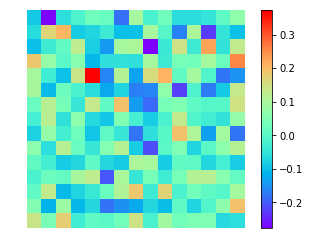

In [32]:
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.set_aspect('equal')
plt.imshow(S, interpolation='nearest',cmap=plt.cm.rainbow)
plt.axis('off')
plt.colorbar()
plt.show()

In [33]:
# np.array(range(6)).reshape([3,2]).flatten()

In [34]:
# S.dot(W)*u

In [35]:
# S = 0.5*(1.0+np.tanh(S.dot(W)*u))
# S

In [36]:
# S.reshape(n,n)

In [37]:
def run(x,W,max_iter=10):
    s=x.copy()
    for i in range(max_iter):
        s_prev=s.copy() # сохраняем состояние
        s = 0.5*(1.0+np.tanh(s.dot(W)/u)) # переходим в новое состояние
        # если состояние не изменилось то завершаем
        if np.all(s==s_prev): break
    print(i)        
    return s        

In [38]:
S = run(S.flatten(),W,max_iter=50)

ValueError: shapes (225,) and (15,15) not aligned: 225 (dim 0) != 15 (dim 0)

In [25]:
# S = np.ones([n,n])-S.reshape(n,n)
S = S.reshape(n,n)
S

array([[0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.

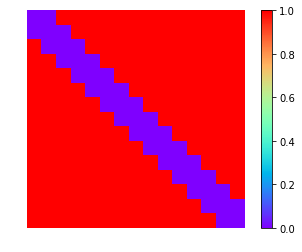

In [26]:
plt.imshow(S, interpolation='nearest',cmap=plt.cm.rainbow)
plt.axis('off')
plt.colorbar()
plt.show()

---

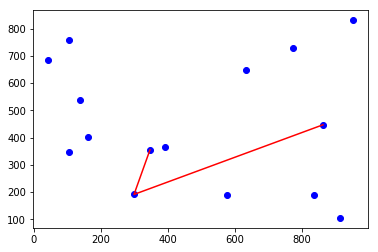

In [27]:
ii = np.argmax( S.reshape(n,n),axis=0)
#ii = np.append(ii,ii[0] )

plt.scatter(x=X[:,0],y=X[:,1],c='b')
plt.plot(X[ii,0],X[ii,1],c='r')

---

In [22]:
# import imageio
# import pickle
# import gzip

In [23]:
# S = 0.5*(1.0+np.tanh(S.dot(W)*u))
# S